In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import scipy.stats as stats
import seaborn as sns
from math import log
from sklearn import preprocessing

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./Data/listings.csv')

In [3]:
# Checking the loaded file
pd.set_option('display.max_columns', len(df.columns))
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210409161521,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10
1,8077,https://www.airbnb.com/rooms/8077,20210409161521,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",$94.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.19
2,23691,https://www.airbnb.com/rooms/23691,20210409161521,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in house,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",$72.00,28,28,28,28,28,28,28.0,28.0,NaN,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,0,2,0,1.64
3,27423,ht

In [4]:
# Checking number of rows and columns of the data
df.shape

(15542, 74)

DataFrame has 15542 rows and 74 columns

In [5]:
# Checking information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15542 entries, 0 to 15541
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15542 non-null  int64  
 1   listing_url                                   15542 non-null  object 
 2   scrape_id                                     15542 non-null  int64  
 3   last_scraped                                  15542 non-null  object 
 4   name                                          15541 non-null  object 
 5   description                                   14988 non-null  object 
 6   neighborhood_overview                         9703 non-null   object 
 7   picture_url                                   15542 non-null  object 
 8   host_id                                       15542 non-null  int64  
 9   host_url                                      15542 non-null 

The DataFrame has mixed type of data. 19 columns are of float type, 21 are of integer type and 34 are of object type. Multiple columns have null values in the cells. The columns neighbourhood_group_cleansed, bathrooms and calendar_updated contain only NaN values.

In [6]:
# Checking more information about the DataFrame
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.554200e+04,1.554200e+04,1.554200e+04,15125.000000,15125.000000,0.0,15542.000000,15542.000000,15542.000000,0.0,14361.000000,15321.000000,15542.000000,1.554200e+04,15542.000000,15542.000000,1.554200e+04,1.554200e+04,15542.000000,1.554200e+04,0.0,15542.000000,15542.000000,15542.000000,15542.000000,15542.000000,15542.000000,15542.00000,11767.000000,11736.000000,11738.000000,11736.000000,11737.000000,11736.000000,11736.000000,15542.000000,15542.000000,15542.000000,15542.000000,11952.000000
mean,2.830004e+07,2.021041e+13,1.168711e+08,5.768397,5.768397,NaN,43.681843,-79.396872,3.047420,NaN,1.427547,1.638274,27.755759,6.505509e+04,27.399112,28.301827,6.179015e+05,1.032423e+06,27.922603,8.939366e+05,NaN,11.013061,25.053339,40.219470,131.619354,26.458628,3.019882,0.21503,94.240758,9.613156,9.397257,9.732618,9.724802,9.720944,9.427914,4.574572,2.803500,1.440291,0.283619,1.032981
std,1.402629e+07,7.687747e+00,1.126182e+08,17.646664,17.646664,NaN,0.049158,0.065567,1.997586,NaN,0.806090,1.098638,38.968903,8.021327e+06,37.941187,40.266829,3.536859e+07,4.626535e+07,39.442760,4.291066e+07,NaN,12.854285,25.988196,39.055061,138.811838,53.696263,8.625500,0.89567,9.500964,0.938398,1.086079,0.816581,0.858074,0.721045,1.004761,8.947311,7.683587,3.333240,3.272965,1.404584
min,1.419000e+03,2.021041e+13,1.565000e+03,0.000000,0.000000,NaN,43.586490,-79.622350,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.699726e+07,2.021041e+13,2.192023e+07,1.000000,1.000000,NaN,43.645513,-79.425795,2.000000,NaN,1.000000,1.000000,28.000000,9.000000e+01,28.000000,28.000000,3.650000e+02,3.650000e+02,28.000000,3.650000e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2.963102e+07,2.021041e+13,7.320732e+07,1.000000,1.000000,NaN,43.663070,-79.396730,2.000000,NaN,1.000000,1.000000,28.000000,1.125000e+03,28.000000,28.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,1.000000,12.000000,37.000000,89.000000,6.000000,0.000000,0.00000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.490000
75%,4.076067e+07,2.021041e+13,1.953586e+08,4.000000,4.000000,NaN,43.703317,-79.376152,4.000000,NaN,2.000000,2.000000,28.000000,1.125000e+03,28.000000,28.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,28.000000,57.000000,87.000000,262.000000,26.000000,2.000000,0.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,1.000000,0.000000,1.300000
max,4.912473e+07,2.021041e+13,3.952870e+08,272.000000,272.000000,NaN,43.843760,-79.117180,16.000000,NaN,9.000000,13.000000,1125.000000,1.000000e+09,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,828.000000,185.000000,20.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.00

It is evident that all listings have atleast 1 bedroom and maximum number of bedrooms available on listing are 9. 
But it does not mean that all bedrooms have beds in them as some listings have zero beds also. Price is an important 
component of Airbnb listings but since it is of object type in the DataFrame, hence its description is not available 
at present. I will change its type to float or int in coming steps for further analysis.

In [7]:
# Converting price column to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['price']

<ipython-input-7-df650e69a16d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


0        469.0
1         94.0
2         72.0
3         45.0
4         50.0
         ...  
15537     36.0
15538     44.0
15539     37.0
15540     55.0
15541    104.0
Name: price, Length: 15542, dtype: float64

In [8]:
# Checking the information about the DataFrame
df['price'].describe()

count    15542.000000
mean       144.959079
std        381.364914
min          0.000000
25%         60.000000
50%         96.000000
75%        150.000000
max      13000.000000
Name: price, dtype: float64

The price column contains zero dollar as the minimum price of the listings. So our data is biased. We have to remove the rows having minimum price value to be zero dollar.

In [9]:
# Removing the rows with $0 price values
df = df[(df[['price']]!=0).all(axis = 1)]
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210409161521,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10
1,8077,https://www.airbnb.com/rooms/8077,20210409161521,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.19
2,23691,https://www.airbnb.com/rooms/23691,20210409161521,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in house,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,28,28,28,28,28.0,28.0,NaN,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,0,2,0,1.64
3,27423,https://

<AxesSubplot:>

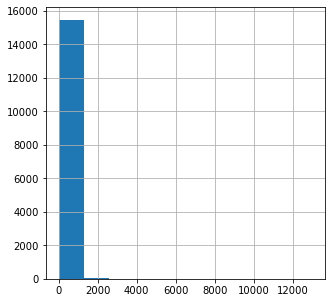

In [10]:
# Draw the price distribution histogram
df['price'].hist(figsize = (5,5))

The above histogram shows that distribution of the price is strongly right skewed. To compensate for the skewed right 
distribution, I would like to calculate the natural log of price variable. I will store the logrithmic price into the 
new column and then run the base line models on both (actual price and logrithmic price value). After that, I would 
compare the results to see if there are any differences.

In [11]:
df['log_price'] = df['price'].apply(lambda x: log(x))
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,...,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,1419,https://www.airbnb.com/rooms/1419,20210409161521,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire house,Entire home/apt,10,NaN,3 baths,5.0,...,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10,6.150603
1,8077,https://www.airbnb.com/rooms/8077,20210409161521,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,...,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.19,4.543295
2,23691,https://www.airbnb.com/rooms/23691,20210409161521,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in house,Private room,3,NaN,1 shared bath,1.0,...,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,28,28,28,28,28.0,28.0,NaN,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,

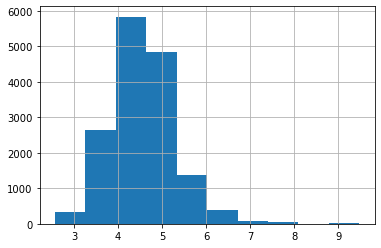

In [12]:
# Draw histogram of log price
df['log_price'].hist();

((array([-3.91821765, -3.69890353, -3.57875873, ...,  3.57875873,
          3.69890353,  3.91821765]),
  array([   13.,    13.,    13., ..., 13000., 13000., 13000.])),
 (150.9551209419802, 144.97773487773486, 0.3957244457838119))

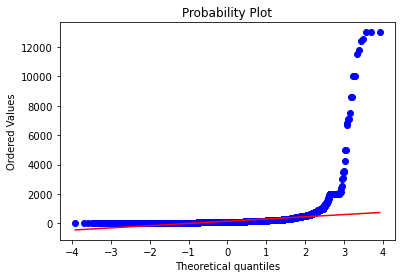

In [13]:
# Drawing probability plot of price column
stats.probplot(df['price'], dist='norm', plot=pylab)

((array([-3.91821765, -3.69890353, -3.57875873, ...,  3.57875873,
          3.69890353,  3.91821765]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 9.47270464, 9.47270464,
         9.47270464])),
 (0.7286634204219575, 4.585654706830445, 0.9845103369286136))

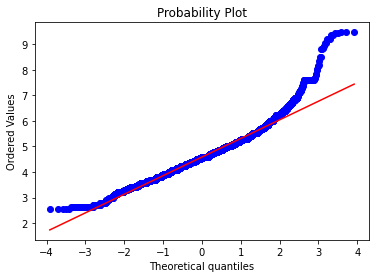

In [14]:
# Drawing probability plot of log_price column
stats.probplot(df['log_price'], dist='norm', plot=pylab)

After transformation, the distribution for log_price resembles that of a normal distribution. 
This normality validation is important in order to fit the assumption of linear regression models.

Through this project I want to predict the listing price. Further, I will be studying the effect of various independent columns in the dataframe on my dependent column(target) 'price'. I think it will be helpful to me if I make price the very first column of the dataframe and log_price column to be the second column.

In [15]:
# Making 'price' and 'log_price' the first column and second column of the dataframe
all_columns = df.columns
all_columns_list = list(all_columns)
all_columns_set = set(all_columns_list)
price_set = set(['price', 'log_price'])
independent_columns = list(all_columns_set.difference(price_set))
df = df[list(price_set) + independent_columns]
df.head()

,log_price,price,availability_60,host_response_rate,minimum_nights_avg_ntm,minimum_maximum_nights,host_response_time,host_neighbourhood,minimum_minimum_nights,review_scores_cleanliness,host_since,host_listings_count,review_scores_checkin,review_scores_communication,id,number_of_reviews,latitude,room_type,number_of_reviews_l30d,bathrooms,description,host_name,maximum_maximum_nights,reviews_per_month,scrape_id,review_scores_rating,host_about,host_url,neighbourhood_group_cleansed,accommodates,picture_url,host_acceptance_rate,calculated_host_listings_count_private_rooms,calculated_host_listings_count,neighbourhood_cleansed,neighborhood_overview,maximum_nights_avg_ntm,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,availability_365,calendar_updated,host_has_profile_pic,host_thumbnail_url,host_location,property_type,last_scraped,amenities,host_total_listings_count,host_id,host_verifications,minimum_nights,review_scores_location,calculated_host_listings_count_shared_rooms,maximum_nights,host_is_superhost,longitude,neighbourhood,beds,host_identity_verified,last_review,availability_90,review_scores_accuracy,bathrooms_text,instant_bookable,maximum_minimum_nights,availability_30,bedrooms,listing_url,first_review,review_scores_value,calendar_last_scraped,host_picture_url,license,name
0,6.150603,469.0,0,NaN,28.0,730,NaN,Commercial Drive,28,10.0,2008-08-08,1.0,10.0,10.0,1419,7,43.64590,Entire home/apt,0,NaN,"This large, family home is located in one of T...",Alexandra,730,0.10,20210409161521,100.0,"I live in Vancouver, Canada with my husband an...",https://www.airbnb.com/users/show/1565,NaN,10,https://a0.muscache.com/pictures/76206750/d643...,NaN,0,1,Little Portugal,The apartment is located in the Ossington stri...,730.0,...,0,1,0,NaN,t,https://a0.muscache.com/im/pictures/user/7aeea...,"Vancouver, British Columbia, Canada",Entire house,2021-04-10,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",1.0,1565,"['email', 'phone', 'reviews', 'jumio', 'govern...",28,10.0,0,730,f,-79.42423,"Toronto, Ontario, Canada",7.0,t,2017-12-04,0,10.0,3 baths,f,28,0,5.0,https://www.airbnb.com/rooms/1419,2015-07-19,10.0,2021-04-10,https://a0.muscache.com/im/pictures/user/7aeea...,NaN,Beautiful home in amazing area!
1,4.543295,94.0,60,0%,180.0,365,a few days or more,Harbourfront,180,10.0,2009-06-22,2.0,10.0,10.0,8077,169,43.64080,Private room,0,NaN,Guest room in a luxury condo with access to al...,Kathie & Larry,365,1.19,20210409161521,97.0,My husband and I have been airbnb host for alm...,https://www.airbnb.com/users/show/22795,NaN,2,https://a0.muscache.com/pictures/11780344/141c...,NaN,1,2,Waterfront Communities-The Island,NaN,365.0,...,0,1,365,NaN,t,https://a0.muscache.com/im/pictures/user/9a077...,"Toronto, Ontario, Canada",Private room in apartment,2021-04-11,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",2.0,22795,"['email', 'phone', 'facebook', 'reviews']",180,10.0,0,365,f,-79.37673,NaN,1.0,f,2013-08-27,90,10.0,1.5 baths,t,180,30,1.0,https://www.airbnb.com/rooms/8077,2009-08-20,10.0,2021-04-11,https://a0.muscache.com/im/pictures/user/9a077...,NaN,Downtown Harbourfront Private Room
2,4.276666,72.0,60,NaN,28.0,28,NaN,Fairbank,28,10.0,2010-03-15,2.0,10.0,10.0,23691,217,43.69805,Private room,0,NaN,<b>The space</b><br />Nestled in the middle of...,Yohan & Sarah,28,1.64,20210409161521,95.0,Welcome to our dwelling place! My wife and I l...,https://www.airbnb.com/users/show/93825,NaN,3,https://a0.muscache.com/pictures/615528/d09ab3...,NaN,2,2,Briar Hill-Belgravia,NaN,28.0,...,0,0,365,NaN,t,https://a0.muscache.com/im/users/93825/profile...,"Toronto, Ontario, Canada",Private room in house,2021-04-12,"[""Lock on bedroom door"", ""Dedicated workspace""...",2.0,93825,"['email', 'phone', 'reviews', 'jumio', 'offlin...",28,9.0,0,28,f,-79.45411,NaN,1.0,t,2019-12-22,90,10.0,1 shared bath,t,28,30,1.0,https://www.airbnb.com/rooms/23691,2010-05-31,10.0,2021-04-12,https://a0.muscache.com/im/users/93825/profile...,NaN,Queen Bedroom clos

df.head() confirms that 'price' column is the first column and 'log_price' is the second column of the dataframe. Now, I would like to check the distribution of price column(target variable)

In [16]:
# Checking for the columns with majority NaN values 
df.columns[df.isnull().sum()/df.shape[0]>0.80]

Index(['bathrooms', 'neighbourhood_group_cleansed', 'calendar_updated'], dtype='object')

In [17]:
# Finding the unique columns with majority NaN values
most_missing_columns = set(df.columns[df.isnull().sum()/df.shape[0] >0.80])
most_missing_columns

{'bathrooms', 'calendar_updated', 'neighbourhood_group_cleansed'}

In [18]:
# Deleting the majority missing values columns
df = df.drop(most_missing_columns, axis = 1)

# Drop unwanted columns

A quick look at df.head() above reveals that there are some columns those have absolutely no effect on the target variable. I would like to drop those columns. 

* Information about the host, host pictures, host since, number of listings by the perticular host, host address, host picture url, host url etc. do not affect the listing price. So, these columns can be dropped.

* Columns such as listing name, listing discription, listing pictures etc. are some important columns, those can highly impact the price of listings, however, at present I am now going on applying any natural language processing(NLP) or image recognization for this project. Therefore, I would drop all such columns. 

* Looking at df.last_scraped shows that all the listings in the df dataframe were scraped from April 9, 2021 to April 13, 2021. This is not going to have any effect on target variable. Hence, I will drop this column.

* Amenities column requires a very detailed analysis and NLP. It is out of scope of this project due to limited time.

* Neighbourhood and neighborhood_overview can be deleted. I am keeping neighbourhood_cleansed for studying.

In [19]:
# Preparing the list of Columns to drop
to_drop = ['host_about', 'host_has_profile_pic','host_identity_verified','host_since','picture_url','host_listings_count',
'last_review','id', 'calculated_host_listings_count','host_thumbnail_url', 'host_id','review_scores_location','calendar_last_scraped',
'calculated_host_listings_count_private_rooms','description', 'scrape_id','first_review', 'name', 'host_picture_url', 'host_location',
'host_neighbourhood', 'listing_url', 'number_of_reviews_l30d', 'calculated_host_listings_count_shared_rooms','last_scraped',
'calculated_host_listings_count_entire_homes','host_name', 'host_total_listings_count', 'host_url','review_scores_communication','number_of_reviews',
'host_response_rate', 'neighborhood_overview', 'amenities','host_verifications', 'neighbourhood', 'license', 'host_acceptance_rate']

# Dropping the selected columns   
df.drop(to_drop, axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15540 entries, 0 to 15541
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  15540 non-null  float64
 1   price                      15540 non-null  float64
 2   availability_60            15540 non-null  int64  
 3   minimum_nights_avg_ntm     15540 non-null  float64
 4   minimum_maximum_nights     15540 non-null  int64  
 5   host_response_time         8403 non-null   object 
 6   minimum_minimum_nights     15540 non-null  int64  
 7   review_scores_cleanliness  11738 non-null  float64
 8   review_scores_checkin      11736 non-null  float64
 9   latitude                   15540 non-null  float64
 10  room_type                  15540 non-null  object 
 11  maximum_maximum_nights     15540 non-null  int64  
 12  reviews_per_month          11952 non-null  float64
 13  review_scores_rating       11767 non-null  flo

Dataframe has total 35 columns remaining. There are 14 float type, 12 int type and 9 object type columns. I will prepare these object type columns for analysis and modeling.

# Fix datatypes


In [21]:
# Parse categorical data columns using sklearn label encoder
cat_cols =['bathrooms_text', 'property_type', 'neighbourhood_cleansed','room_type','host_response_time']

def create_labelencoder(cols_list):
    for col in cols_list:
        le = preprocessing.LabelEncoder()
        df[col]= df[col].astype('str')
        le.fit(df[col])
        df[col] = le.transform(df[col])
        # Save Label Encoders for future reverse process if needed
        np.save('./LabelEncoder/'+col+'.npy',le.classes_)
        
create_labelencoder(cat_cols)     

In [22]:
# Checking the dataframe for encoders
df.head()

,log_price,price,availability_60,minimum_nights_avg_ntm,minimum_maximum_nights,host_response_time,minimum_minimum_nights,review_scores_cleanliness,review_scores_checkin,latitude,room_type,maximum_maximum_nights,reviews_per_month,review_scores_rating,accommodates,neighbourhood_cleansed,maximum_nights_avg_ntm,has_availability,number_of_reviews_ltm,availability_365,property_type,minimum_nights,maximum_nights,host_is_superhost,longitude,beds,availability_90,review_scores_accuracy,bathrooms_text,instant_bookable,maximum_minimum_nights,availability_30,bedrooms,review_scores_value
0,6.150603,469.0,0,28.0,730,1,28,10.0,10.0,43.64590,0,730,0.10,100.0,10,71,730.0,t,0,0,14,28,730,f,-79.42423,7.0,0,10.0,11,f,28,0,5.0,10.0
1,4.543295,94.0,60,180.0,365,0,180,10.0,10.0,43.64080,2,365,1.19,97.0,2,122,365.0,t,0,365,21,180,365,f,-79.37673,1.0,90,10.0,5,t,180,30,1.0,10.0
2,4.276666,72.0,60,28.0,28,1,28,10.0,10.0,43.69805,2,28,1.64,95.0,3,15,28.0,t,0,365,36,28,28,f,-79.45411,1.0,90,10.0,4,t,28,30,1.0,10.0
3,3.806662,45.0,0,365.0,365,1,365,10.0,10.0,43.66884,0,365,0.20,98.0,1,110,365.0,t,0,42,5,365,365,f,-79.32725,1.0,0,10.0,2,f,365,0,NaN,10.0
4,3.912023,50.0,34,30.0,365,3,30,10.0,10.0,43.69958,0,365,0.10,97.0,1,83,365.0,t,0,339,5,30,365,f,-79.38814,0.0,64,10.0,2,f,30,4,NaN,10.0


In [23]:
# Fix instant_bookable
bool_dict={'t': True, 'f': False}
df['instant_bookable'] = df['instant_bookable'].map(bool_dict).astype(bool)
df['instant_bookable'].value_counts()

False    11011
True      4529
Name: instant_bookable, dtype: int64

In [24]:
# Fix has_availability
df['has_availability'] = df['has_availability'].map(bool_dict).astype(bool)
df['has_availability'].value_counts()

True     14955
False      585
Name: has_availability, dtype: int64

In [25]:
# Fix host_is_superhost
df['host_is_superhost'] = df['host_is_superhost'].map(bool_dict).astype(bool)
df['host_is_superhost'].value_counts()

False    11169
True      4371
Name: host_is_superhost, dtype: int64

In [26]:
# Checking dataframe info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15540 entries, 0 to 15541
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  15540 non-null  float64
 1   price                      15540 non-null  float64
 2   availability_60            15540 non-null  int64  
 3   minimum_nights_avg_ntm     15540 non-null  float64
 4   minimum_maximum_nights     15540 non-null  int64  
 5   host_response_time         15540 non-null  int64  
 6   minimum_minimum_nights     15540 non-null  int64  
 7   review_scores_cleanliness  11738 non-null  float64
 8   review_scores_checkin      11736 non-null  float64
 9   latitude                   15540 non-null  float64
 10  room_type                  15540 non-null  int64  
 11  maximum_maximum_nights     15540 non-null  int64  
 12  reviews_per_month          11952 non-null  float64
 13  review_scores_rating       11767 non-null  flo

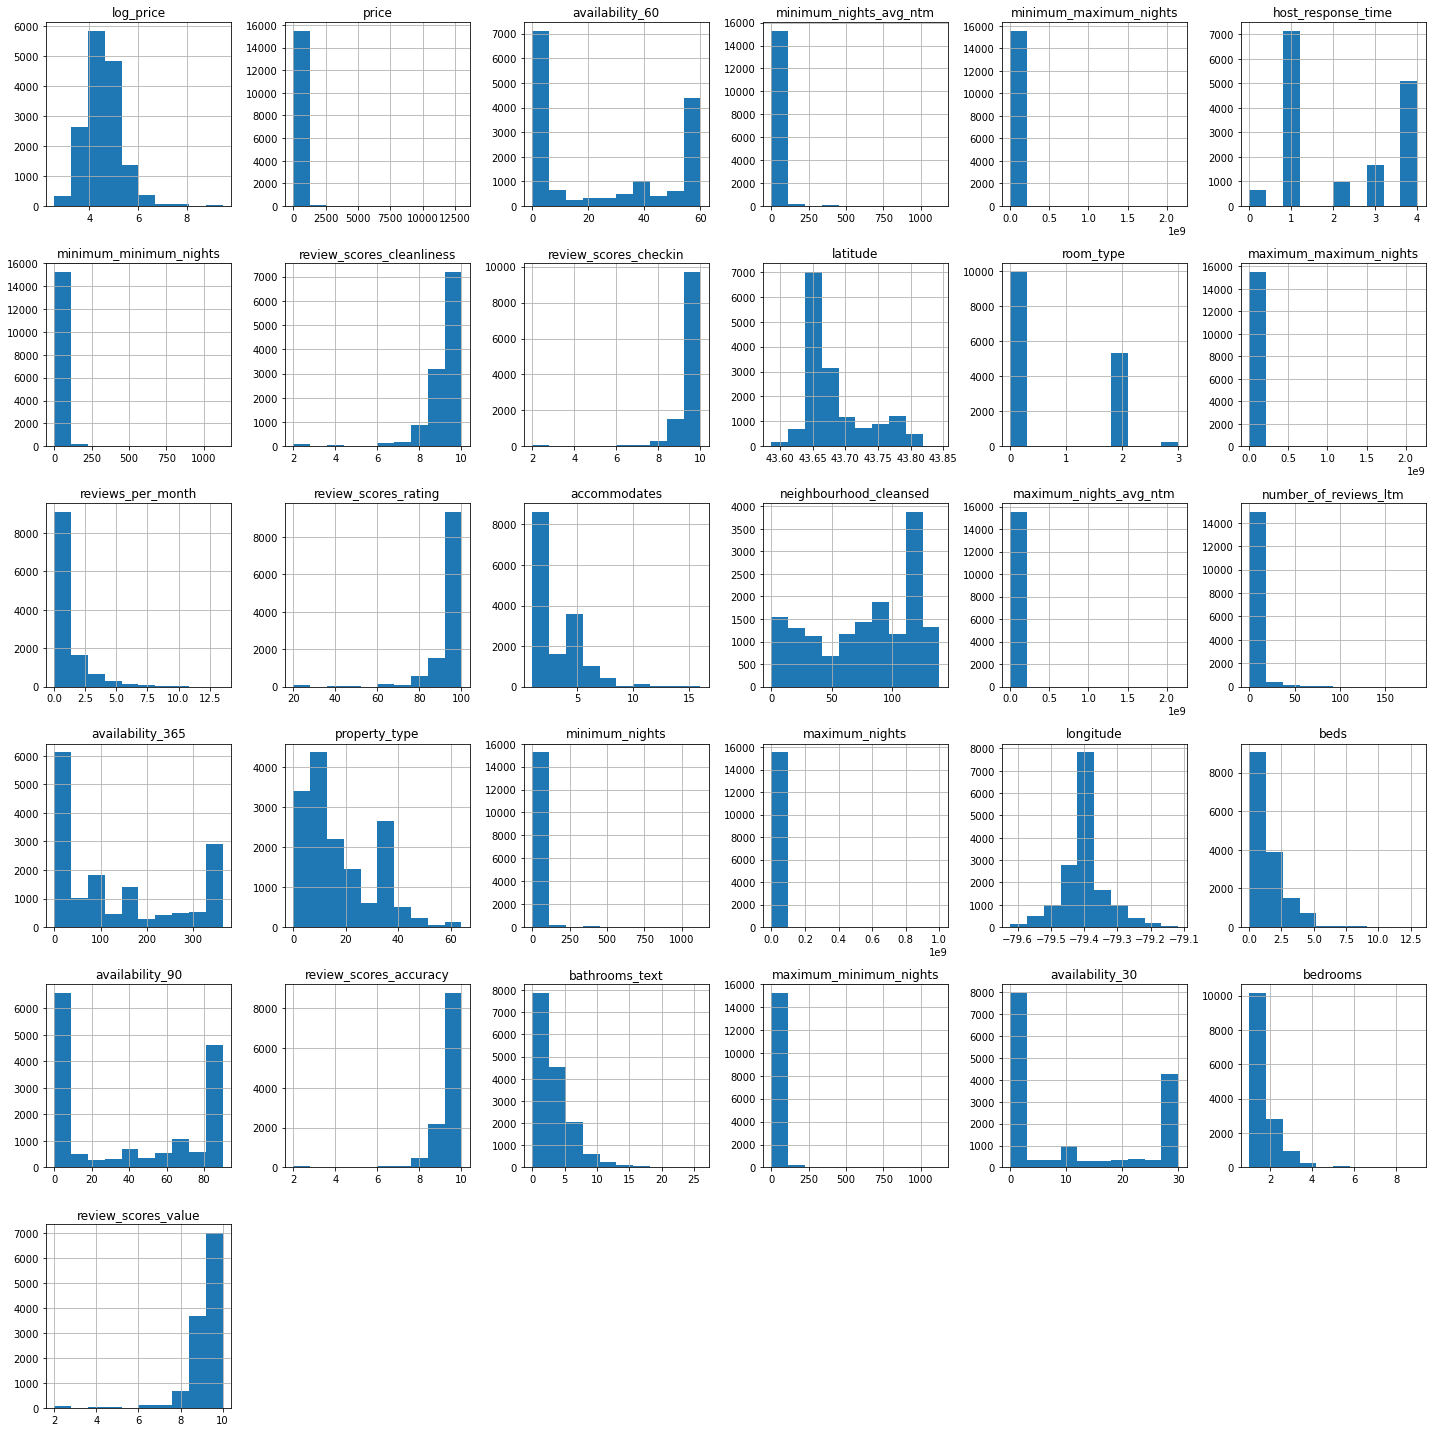

In [27]:
# Plotting the histogram plot for all numeric and boolean columns
df.hist(figsize = (20, 20), bins = 10)
plt.tight_layout()

It is clear from the histogram that many columns have only one category of data. Hence, they can be delected from the 
dataframe. Columns such as 'minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
can be deleted.

In [28]:
df.columns

Index(['log_price', 'price', 'availability_60', 'minimum_nights_avg_ntm',
       'minimum_maximum_nights', 'host_response_time',
       'minimum_minimum_nights', 'review_scores_cleanliness',
       'review_scores_checkin', 'latitude', 'room_type',
       'maximum_maximum_nights', 'reviews_per_month', 'review_scores_rating',
       'accommodates', 'neighbourhood_cleansed', 'maximum_nights_avg_ntm',
       'has_availability', 'number_of_reviews_ltm', 'availability_365',
       'property_type', 'minimum_nights', 'maximum_nights',
       'host_is_superhost', 'longitude', 'beds', 'availability_90',
       'review_scores_accuracy', 'bathrooms_text', 'instant_bookable',
       'maximum_minimum_nights', 'availability_30', 'bedrooms',
       'review_scores_value'],
      dtype='object')

In [29]:
# Deleting the single category columns
to_drop = ['minimum_maximum_nights', 'maximum_nights_avg_ntm', 'maximum_minimum_nights','minimum_nights_avg_ntm', 'maximum_maximum_nights','minimum_minimum_nights']
df = df.drop(to_drop, axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15540 entries, 0 to 15541
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  15540 non-null  float64
 1   price                      15540 non-null  float64
 2   availability_60            15540 non-null  int64  
 3   host_response_time         15540 non-null  int64  
 4   review_scores_cleanliness  11738 non-null  float64
 5   review_scores_checkin      11736 non-null  float64
 6   latitude                   15540 non-null  float64
 7   room_type                  15540 non-null  int64  
 8   reviews_per_month          11952 non-null  float64
 9   review_scores_rating       11767 non-null  float64
 10  accommodates               15540 non-null  int64  
 11  neighbourhood_cleansed     15540 non-null  int64  
 12  has_availability           15540 non-null  bool   
 13  number_of_reviews_ltm      15540 non-null  int

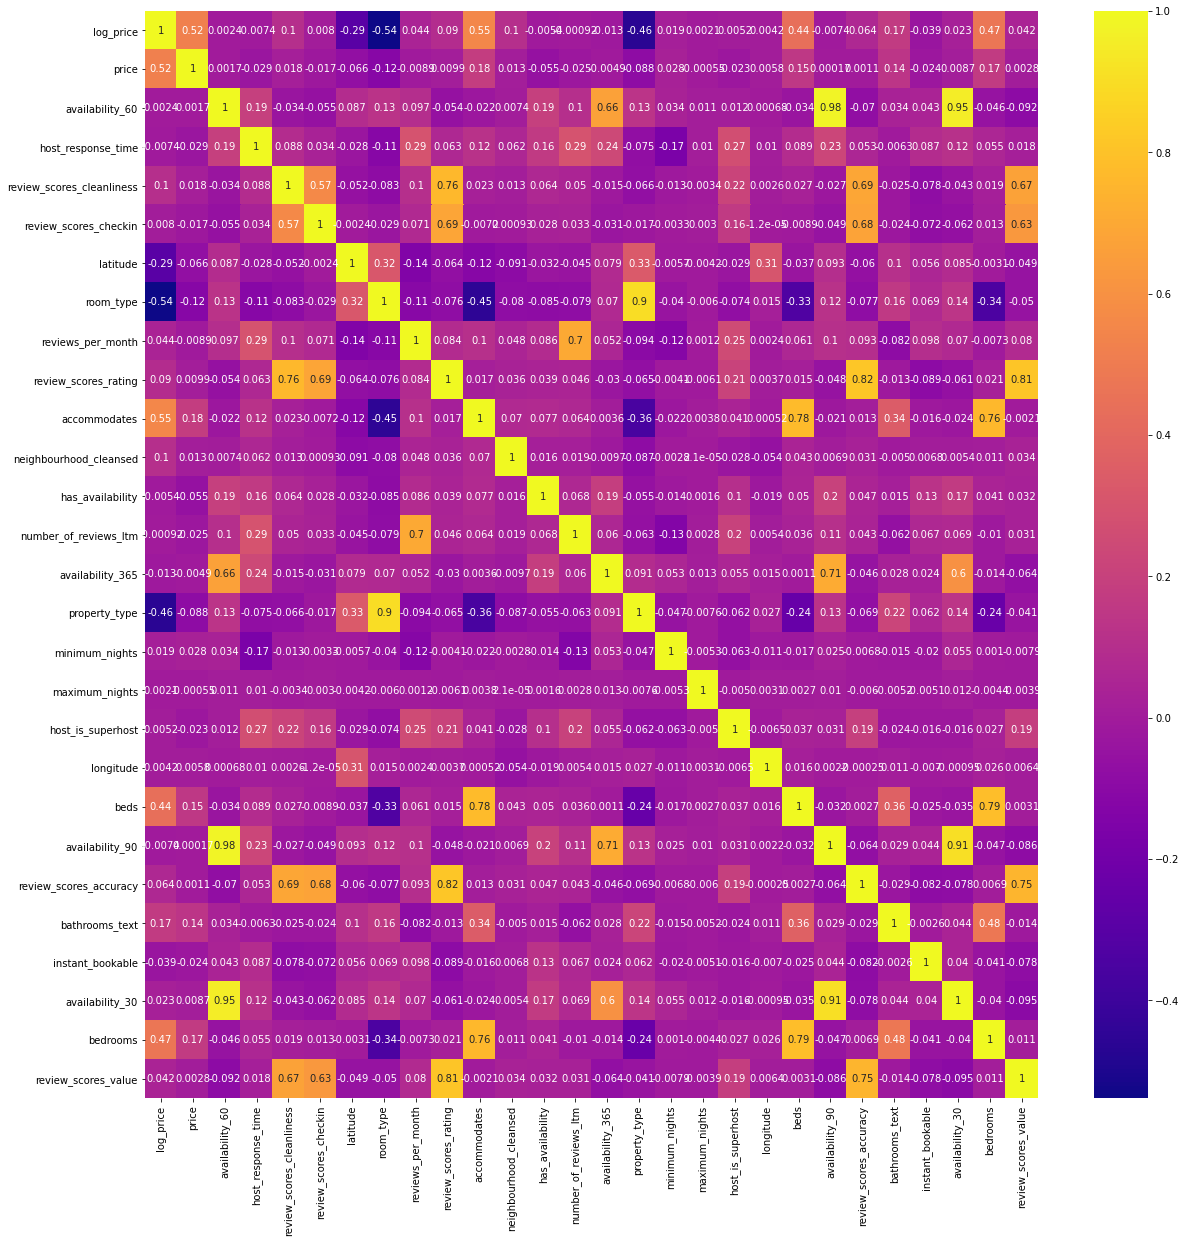

In [31]:
dfcorr = df.corr()
fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(dfcorr , annot = True, cmap = 'plasma')

In [32]:
df.isna().sum()

log_price                       0
price                           0
availability_60                 0
host_response_time              0
review_scores_cleanliness    3802
review_scores_checkin        3804
latitude                        0
room_type                       0
reviews_per_month            3588
review_scores_rating         3773
accommodates                    0
neighbourhood_cleansed          0
has_availability                0
number_of_reviews_ltm           0
availability_365                0
property_type                   0
minimum_nights                  0
maximum_nights                  0
host_is_superhost               0
longitude                       0
beds                          219
availability_90                 0
review_scores_accuracy       3804
bathrooms_text                  0
instant_bookable                0
availability_30                 0
bedrooms                     1179
review_scores_value          3804
dtype: int64

In [33]:
df.shape

(15540, 28)

In [34]:
df.dropna(inplace=True)

In [35]:
df.shape

(10799, 28)

In [36]:
df.isna().sum()

log_price                    0
price                        0
availability_60              0
host_response_time           0
review_scores_cleanliness    0
review_scores_checkin        0
latitude                     0
room_type                    0
reviews_per_month            0
review_scores_rating         0
accommodates                 0
neighbourhood_cleansed       0
has_availability             0
number_of_reviews_ltm        0
availability_365             0
property_type                0
minimum_nights               0
maximum_nights               0
host_is_superhost            0
longitude                    0
beds                         0
availability_90              0
review_scores_accuracy       0
bathrooms_text               0
instant_bookable             0
availability_30              0
bedrooms                     0
review_scores_value          0
dtype: int64

# Modelling 

In [37]:
X = df.drop('price','log_price', axis=1)
y = df['price']

TypeError: drop() got multiple values for argument 'axis'

In [78]:
# Checking the data again
df.head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/1419,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0.10
1,https://www.airbnb.com/rooms/8077,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,1.19
2,https://www.airbnb.com/rooms/23691,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,0,2,1.64
3,https://www.airbnb.com/rooms/27423,2021-04-12,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,https://www.airbnb.com/users/show/118124,Brent,2010-05-04,"Toronto, Ontario, Canada",I love to travel and meet new people from arou...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/f687f...,https://a0.muscache.com/im/pictures/user/f687f...,Greenwood-Coxwell,1.0,1

After looking at the data, it can be easily concluded that some of the columns have no significance on the price of the
listing. Thus, they can be dropped from the dataframe. 

In [79]:
# Dropping the columns 
to_drop= ['listing_url', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url',
          'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
         'host_acceptance_rate', 'host_is_superhost','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
         'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'calendar_last_scraped',
         'first_review', 'last_review', 'license', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
         'availability_365', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms', 'reviews_per_month' ]
df.drop(to_drop, axis=1, inplace=True)
df.head()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1.0,1.0,Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,7,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,2.0,2.0,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,169,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t
2,2.0,2.0,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,217,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t
3,1.0,1.0,South Riverdale,43.66884,-79.32725,Entire apartment,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",45.0,365,365,26,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,3.0,3.0,Mount Pleasant West,43.69958,-79.38814,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",50.0,30,365,7,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [80]:
# Checking the data again
df.shape

(15542, 25)

In [81]:
df.dtypes

host_listings_count            float64
host_total_listings_count      float64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
amenities                       object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
number_of_reviews_ltm            int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
dtype: object

In [82]:
df.head()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1.0,1.0,Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,7,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,2.0,2.0,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,169,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t
2,2.0,2.0,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,217,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t
3,1.0,1.0,South Riverdale,43.66884,-79.32725,Entire apartment,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",45.0,365,365,26,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,3.0,3.0,Mount Pleasant West,43.69958,-79.38814,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",50.0,30,365,7,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f


From data, it is clear that host_listings_count,host_total_listings_count have no affect on the the price of the listings and I have kept neighbourhood_cleansed column for futher analysis. Also, it is difficult to study the influence of latitude and longitude on predicting the pricing of the listings. Thus, these columns can also be dropped.

In [21]:
to_drop = ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude']
df.drop(to_drop, axis = 1, inplace = True)
df.head()

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,Little Portugal,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,t,0,0,0,0,7,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10
1,Waterfront Communities-The Island,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,t,30,60,90,365,169,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2,1,1,1.19
2,Briar Hill-Belgravia,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,t,30,60,90,365,217,0,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,2,0,2,1.64
3,South Riverdale,Entire apartment,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",45.0,365,365,t,0,0,0,42,26,0,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.20
4,Mount Pleasant West,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",50.0,30,365,t,4,34,64,339,7,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10


In [57]:
#dfcorr = df.corr()
#fig, ax = plt.subplots(figsize = (25,25))
#ax = sns.heatmap(dfcorr , annot = True, cmap = 'plasma')

In [60]:
set(df['neighbourhood_cleansed'])

{'Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St.James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',
 'Forest Hill North',